In [6]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Chocolate Sales.csv')

In [3]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [5]:
df.describe()

,Boxes Shipped
count,1094.000000
mean,161.797989
std,121.544145
min,1.000000
25%,70.000000
50%,135.000000
75%,228.750000
max,709.000000


In [12]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # errors='coerce' will handle invalid dates gracefully

C:\Users\sthefany.bspina\AppData\Local\Temp\ipykernel_49232\2063664613.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # errors='coerce' will handle invalid dates gracefully


In [13]:
# Now extract parts from the date
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day
df['Quarter'] = df['Date'].dt.quarter

In [14]:
# Now Cleaning the Amount column i.e. removing $ and commas, and converting it to float
df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True).astype(float)
df

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\sthefany.bspina\AppData\Local\Temp\ipykernel_49232\2604653026.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True).astype(float)


,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Month,Year,Day,Quarter
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180,1,2022,4,1
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94,8,2022,1,3
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91,7,2022,7,3
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342,4,2022,27,2
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184,2,2022,24,1
...,...,...,...,...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,2022-05-17,4410.0,323,5,2022,17,2
1090,Jehu Rudeforth,USA,White Choc,2022-06-07,6559.0,119,6,2022,7,2
1091,Ches Bonnell,Canada,Organic Choco Syrup,2022-07-26,574.0,217,7,2022,26,3
1092,Dotty Strutley,India,Eclairs,2022-07-28,2086.0,384,7,2022,28,3


In [15]:
monthly_sales_by_product = df.groupby(['Year', 'Month', 'Product'])['Amount'].sum().reset_index()

In [16]:
quarterly_sales_by_product = df.groupby(['Year', 'Quarter', 'Product'])['Amount'].sum().reset_index()

In [17]:
#Which Sales Person has generated highest amount?
sales_by_sales_person = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False)
sales_by_sales_person.head()

Sales Person
Ches Bonnell       320901.0
Oby Sorrel         316645.0
Madelene Upcott    316099.0
Brien Boise        312816.0
Kelci Walkden      311710.0
Name: Amount, dtype: float64

In [18]:
# Average Sales by Sales Person
avg_sales_by_sales_person = df.groupby('Sales Person')['Amount'].mean().sort_values(ascending=False)
avg_sales_by_sales_person.head()

Sales Person
Madelene Upcott        7024.422222
Ches Bonnell           6685.437500
Oby Sorrel             6462.142857
Rafaelita Blaksland    6183.676471
Camilla Castle         6144.250000
Name: Amount, dtype: float64

In [19]:
#Which Country has Generated Highest Sales?
sales_by_country = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)
sales_by_country

Country
Australia      1137367.0
UK             1051792.0
India          1045800.0
USA            1035349.0
Canada          962899.0
New Zealand     950418.0
Name: Amount, dtype: float64

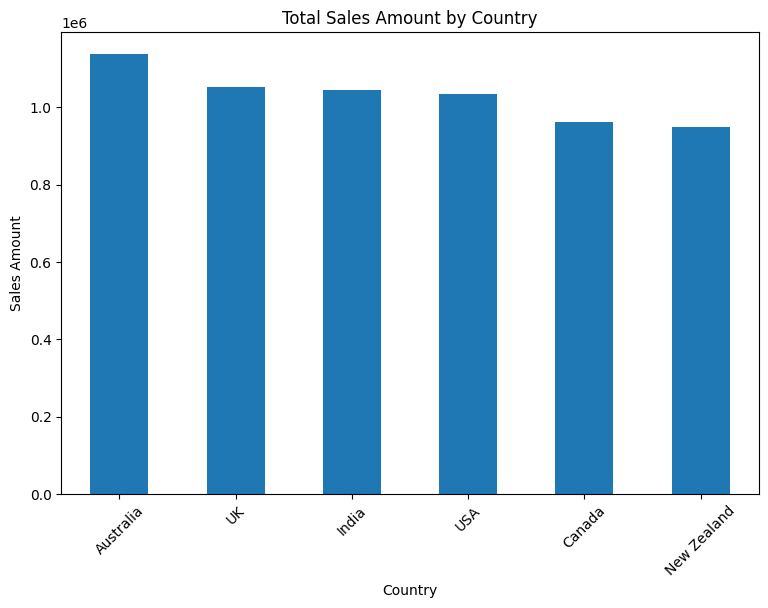

In [20]:
plt.figure(figsize=(9, 6))
sales_by_country.plot(kind='bar')
plt.title('Total Sales Amount by Country')
plt.ylabel('Sales Amount')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()

In [21]:
#Which Product is best seller?
total_sales = df.groupby('Product')['Amount'].sum().sort_values(ascending=False)
total_sales

Product
Smooth Sliky Salty      349692.0
50% Dark Bites          341712.0
White Choc              329147.0
Peanut Butter Cubes     324842.0
Eclairs                 312445.0
99% Dark & Pure         299796.0
85% Dark Bars           299229.0
Organic Choco Syrup     294700.0
Spicy Special Slims     293454.0
Mint Chip Choco         283969.0
Almond Choco            277536.0
Manuka Honey Choco      275541.0
Milk Bars               269248.0
Raspberry Choco         264740.0
After Nines             261331.0
Fruit & Nut Bars        259147.0
Drinking Coco           256655.0
Orange Choco            256144.0
Baker's Choco Chips     249613.0
Choco Coated Almonds    241486.0
Caramel Stuffed Bars    231588.0
70% Dark Bites          211610.0
Name: Amount, dtype: float64

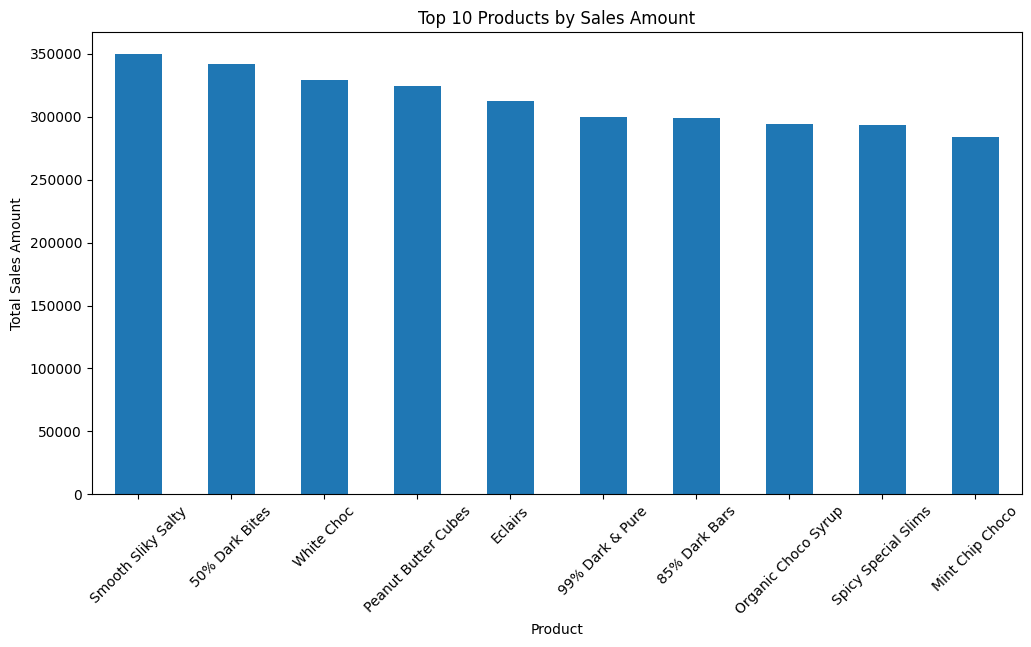

In [24]:
total_sales = df.groupby('Product')['Amount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
total_sales.plot(kind='bar')
plt.title('Top 10 Products by Sales Amount')
plt.ylabel('Total Sales Amount')
plt.xlabel('Product')
plt.xticks(rotation=45)
plt.show()

In [25]:
#What is the revenue generated per box?
df['Revenue_per_box'] = df['Amount'] / df['Boxes Shipped']
df['Revenue_per_box']

0       29.555556
1       84.000000
2       49.461538
3       37.210526
4       74.375000
          ...    
1089    13.653251
1090    55.117647
1091     2.645161
1092     5.432292
1093    14.752907
Name: Revenue_per_box, Length: 1094, dtype: float64

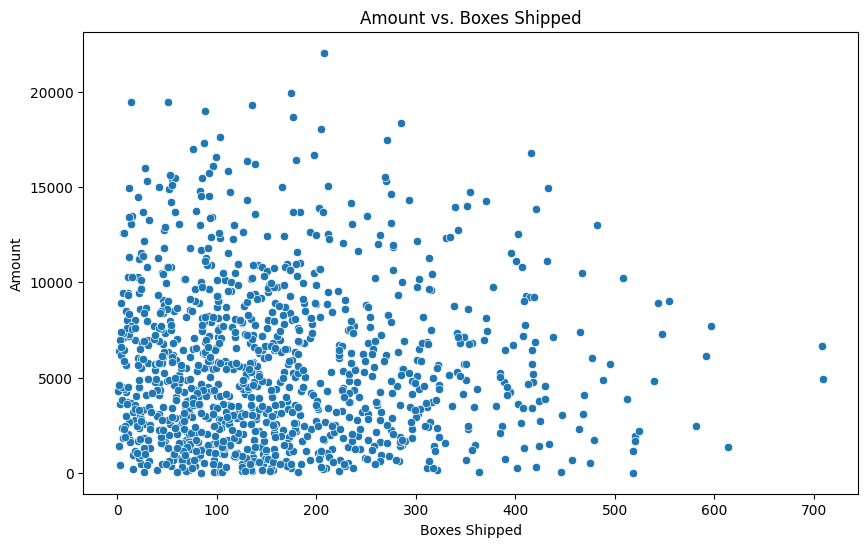

In [26]:
#Any Correlation between Amount & Boxes Shipped?
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Boxes Shipped', y='Amount', data=df)
plt.title('Amount vs. Boxes Shipped')
plt.show()